<img src="https://raw.githubusercontent.com/UCLAMAEThreads/MAE103/master/notebook/logo_UCLA_blue_boxed.svg" alt="ucla logo" width="150" align="left"/>

### **MAE 103 - Elementary Fluid Mechanics**
<hr />

# Dimensional analysis example - pump flow
In this example, we will find an appropriate set of dimensionless parameters that
relate pressure increase across a pump to the flow rate through the pump. We start
with the basic expectation that pressure increase $\Delta p$ should depend on $D$
(the diameter of the pump), $\rho$ (the fluid density), $\omega$ (the rotational speed),
and $Q$ (the volume flow rate)

$$\Delta p = f(D,\rho,\omega,Q)$$

### Set up the module

In [1]:
using MAE103

In [2]:
using Plots
using JLD # to read/write data

### Read in some raw data
First, we will read in some raw experimental data for a pump of diameter 12 in.
These data give the measured pressure rise (as *head increase*, $h_p$, units of meters)
vs volume flow rate (in units of cubic meters per second).

We will load in data for pump speeds of 250, 500 and 1000 rpm. For later convenience,
we will put all of these data into one data structure called `pumpdata`.

In [3]:
pumpdata = load("pumpdata.jld")

Dict{String,Any} with 3 entries:
  "500rpm"  => Dict("Q"=>[0.0, 0.0209691, 0.0419383, 0.0629074, 0.0838766, 0.10…
  "1000rpm" => Dict("Q"=>[0.0, 0.0419383, 0.0838766, 0.125815, 0.167753, 0.2096…
  "250rpm"  => Dict("Q"=>[0.0, 0.0104846, 0.0209691, 0.0314537, 0.0419383, 0.05…

The data is in the form of a `Dict` (short for dictionary). For example,
to get the flow rates for speed 500 rpm,

In [4]:
pumpdata["500rpm"]["Q"]

8-element Array{Float64,1}:
 0.0
 0.020969142203331865
 0.04193828440666373
 0.06290742660999558
 0.08387656881332746
 0.10484571101665932
 0.12581485321999117
 0.14678399542332304

and the associated head increases are

In [5]:
pumpdata["500rpm"]["head"]

8-element Array{Float64,1}:
 5.664863501386198
 5.678840855291137
 5.647258945899934
 5.657487429925689
 5.246758181966145
 4.755642659695044
 3.671452441175552
 0.9659942449994097

Let's plot this data

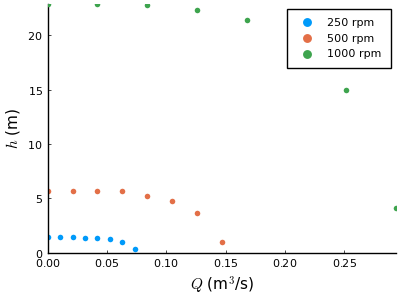

In [6]:
scatter(xlabel=L"$Q$ (m$^3$/s)",ylabel=L"$h$ (m)",legend=true,xlims=(0,Inf),ylims=(0,Inf))
scatter!(pumpdata["250rpm"]["Q"],pumpdata["250rpm"]["head"],label="250 rpm")
scatter!(pumpdata["500rpm"]["Q"],pumpdata["500rpm"]["head"],label="500 rpm")
scatter!(pumpdata["1000rpm"]["Q"],pumpdata["1000rpm"]["head"],label="1000 rpm")

The data don't appear very similar to each other, except for a rough shape.
And more importantly, these are only curves for three pump speeds. What if
we want to predict the performance at, say, 700 rpm?

### Find a suitable set of dimensionless parameters ($\Pi$ groups)
Here, we should think of $\Delta p$ as the dependent variable and $Q$ as the
independent variable -- this is what defines a pump's characteristics. The other
quantities are the reference quantities. It is straightforward to come up with the
$\Pi$ groups:

$$\dfrac{\Delta p}{\rho \omega^2 D^2} = f \left( \dfrac{Q}{\omega D^3} \right)$$

### Rewrite the first $\Pi$ group in terms of the pump's head gain, $h_p$.
From the energy equation, $h_p + p_1/\rho g = p_2/\rho g$, where $\Delta p = p_2 - p_1$.
Thus, we can rewrite the first $\Pi$ group in terms of $h_p$, so that the relationship is

$$\dfrac{g h_p}{\omega^2 D^2} = f \left( \dfrac{Q}{\omega D^3} \right)$$

### Calculate the $\Pi$ groups and plot them on the same plot
We will now use the raw dimensional data in `pumpdata` to calculate the
$\Pi$ groups. However, we need to make sure all of the quantities are in a common
system of units first. We have the pump data in SI units already. We will also
convert the pump speed and diameter to SI.

In [7]:
D_in = 12
omega_rpm = [250,500,1000];

For the conversion, we need a few conversion factors:

In [8]:
g_mpersec2 = 9.81
rpm_to_radpersec = 2π/60
in_to_cm = 2.54
cm_to_m = 1/100

0.01

Now get SI values for each of the parameters

In [9]:
D = D_in*in_to_cm*cm_to_m
g = g_mpersec2
omega = omega_rpm*rpm_to_radpersec;

We can now calculate the $\Pi$ groups. We will refer to these as `Q_nd`
and `head_nd` (`nd` for non-dimensional):

In [10]:
omega = 250*rpm_to_radpersec
pumpdata["250rpm"]["Q_nd"] = pumpdata["250rpm"]["Q"]/(omega*D^3)
pumpdata["250rpm"]["head_nd"] = pumpdata["250rpm"]["head"]*g/(omega^2*D^2)

8-element Array{Float64,1}:
 0.21740014772722474
 0.21535407041382176
 0.22487741406722742
 0.2126604068380415
 0.20579202747444353
 0.1867603561604683
 0.14929923397052133
 0.04540320703179131

In [11]:
omega = 500*rpm_to_radpersec
pumpdata["500rpm"]["Q_nd"] = pumpdata["500rpm"]["Q"]/(omega*D^3)
pumpdata["500rpm"]["head_nd"] = pumpdata["500rpm"]["head"]*g/(omega^2*D^2)

8-element Array{Float64,1}:
 0.21818821389469506
 0.21872656647507874
 0.2175101558060901
 0.21790411669497714
 0.20208444496154965
 0.18316861078583285
 0.14140987692702384
 0.037206290830732354

In [12]:
omega = 1000*rpm_to_radpersec
pumpdata["1000rpm"]["Q_nd"] = pumpdata["1000rpm"]["Q"]/(omega*D^3)
pumpdata["1000rpm"]["head_nd"] = pumpdata["1000rpm"]["head"]*g/(omega^2*D^2)

8-element Array{Float64,1}:
 0.22011547689348201
 0.22035761493979175
 0.21919142788730842
 0.2154050865757219
 0.20627319562048935
 0.18399049259140637
 0.14371375238774506
 0.03935060650125385

Now plot these

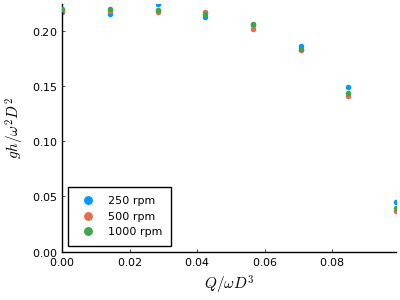

In [13]:
scatter(xlabel=L"$Q/\omega D^3$",ylabel=L"$gh/\omega^2 D^2$",legend=:bottomleft,xlims=(0,Inf),ylims=(0,Inf))
scatter!(pumpdata["250rpm"]["Q_nd"],pumpdata["250rpm"]["head_nd"],label="250 rpm")
scatter!(pumpdata["500rpm"]["Q_nd"],pumpdata["500rpm"]["head_nd"],label="500 rpm")
scatter!(pumpdata["1000rpm"]["Q_nd"],pumpdata["1000rpm"]["head_nd"],label="1000 rpm")

The data collapse onto a single curve. This reveals the power of dimensional
analysis! One would follow up by generating a statistical correlation
between the two dimensionless parameters. Then, we could use this correlation
to predict performance at any pump speed or pump diameter!

In [14]:
#savefig("pumpplot.pdf")

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*